In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALL_AI_feet_v1.csv')
df1.tail(5)

,DEPTH,P_Impedance_Orig_Jacana_1,P_Impedance_Orig_Tarotaro_1,P_Impedance_Orig_Tigana_1,P_Impedance_Orig_Tigana_Sur_2,P_Impedance_Orig_Tilo_1
10067,11143.5,NaN,NaN,NaN,NaN,1.010777e+07
10068,11144.0,NaN,NaN,NaN,NaN,1.010485e+07
10069,11144.5,NaN,NaN,NaN,NaN,1.009122e+07
10070,11145.0,NaN,NaN,NaN,NaN,1.003315e+07
10071,11145.5,NaN,NaN,NaN,NaN,1.003211e+07


In [ ]:
df=df1.loc[:,['DEPTH','P_Impedance_Orig_Jacana_1', 'P_Impedance_Orig_Tigana_1', 'P_Impedance_Orig_Tigana_Sur_2']]
df=df.dropna().sort_index(ascending=False)

In [ ]:
df

,DEPTH,P_Impedance_Orig_Jacana_1,P_Impedance_Orig_Tigana_1,P_Impedance_Orig_Tigana_Sur_2
9351,10785.5,1.038965e+07,9.648502e+06,9.397183e+06
9350,10785.0,1.050666e+07,9.635426e+06,9.494157e+06
9349,10784.5,1.084664e+07,9.428387e+06,9.408238e+06
9348,10784.0,1.126829e+07,9.262972e+06,9.292719e+06
9347,10783.5,1.218221e+07,9.178274e+06,9.529296e+06
...,...,...,...,...
5108,8664.0,6.284371e+06,6.645608e+06,6.843887e+06
5107,8663.5,6.254087e+06,6.645608e+06,6.830269e+06
5106,8663.0,6.253236e+06,6.647746e+06,6.808649e+06
5105,8662.5,6.358802e+06,6.676022e+06,6.835924e+06


In [ ]:
train_data=pd.Series(df['DEPTH'])
train_data

9351    10785.5
9350    10785.0
9349    10784.5
9348    10784.0
9347    10783.5
         ...   
5108     8664.0
5107     8663.5
5106     8663.0
5105     8662.5
5104     8662.0
Name: DEPTH, Length: 4245, dtype: float64

In [ ]:
cols = list(df)[1:6]
df_for_training = df[cols].astype(float)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
trainX = []
trainY = []

In [ ]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (4231, 14, 3).
trainY shape == (4231, 1).


In my case, trainX has a shape (4231, 14, 3). 
4234 because we are looking back 14 days (4231 - 14 = 4217). 
Remember that we cannot look back 14 days until we get to the 15th day. 
Also, trainY has a shape (4231, 1). Our model only predicts a single value, but 
it needs multiple variables (3 in my example) to make this prediction. 
This is why we can only predict a single day after our training, the day after where our data ends.
To predict more days in future, we need all the 3 variables which we do not have. 
We need to predict all variables if we want to do that.

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 64)            17408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
238/238 [==============================] - 7s 19ms/step - loss: 0.3899 - val_loss: 0.1378
Epoch 2/5
238/238 [==============================] - 4s 15ms/step - loss: 0.1519 - val_loss: 0.0521
Epoch 3/5
238/238 [==============================] - 4s 17ms/step - loss: 0.1001 - val_loss: 0.0297
Epoch 4/5
238/238 [==============================] - 3s 14ms/step - loss: 0.0866 - val_loss: 0.0354
Epoch 5/5
238/238 [==============================] - 3s 13ms/step - loss: 0.0801 - val_loss: 0.0277


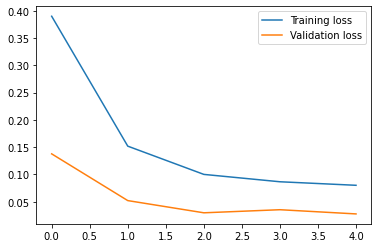

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
n_future=90
predict_data=[]
depth_data=int(list(train_data)[-1])+0.5
for i in range(n_future):
  
  depth_data=depth_data+0.5
  predict_data.append(depth_data)


#predict_data

#Acondicionamiento Datos Well Tilo

In [ ]:
df_tilo1=df1.loc[:,['DEPTH','P_Impedance_Orig_Tigana_Sur_2', 'P_Impedance_Orig_Tigana_1','P_Impedance_Orig_Tilo_1']].sort_index(ascending=False)
df_tilo=df_tilo1.dropna()
df_tilo

,DEPTH,P_Impedance_Orig_Tigana_Sur_2,P_Impedance_Orig_Tigana_1,P_Impedance_Orig_Tilo_1
9897,11058.5,9.572675e+06,9.469339e+06,1.029973e+07
9896,11058.0,9.523074e+06,9.431762e+06,1.037811e+07
9895,11057.5,9.699724e+06,9.530007e+06,1.032239e+07
9894,11057.0,9.778567e+06,9.608222e+06,1.025428e+07
9893,11056.5,9.881845e+06,9.607510e+06,1.032887e+07
...,...,...,...,...
8334,10277.0,1.059163e+07,1.002335e+07,7.797628e+06
8333,10276.5,1.087256e+07,1.015920e+07,7.511554e+06
8332,10276.0,1.083685e+07,1.000030e+07,6.754105e+06
8331,10275.5,1.070435e+07,9.846709e+06,6.476298e+06


In [ ]:
train_data_tilo=pd.Series(df_tilo['DEPTH'])
train_data_tilo

9897    11058.5
9896    11058.0
9895    11057.5
9894    11057.0
9893    11056.5
         ...   
8334    10277.0
8333    10276.5
8332    10276.0
8331    10275.5
8330    10275.0
Name: DEPTH, Length: 1568, dtype: float64

In [ ]:
cols = list(df_tilo)[1:6]
df_for_training_tilo = df_tilo[cols].astype(float)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training_tilo)
df_for_training_scaled = scaler.transform(df_for_training_tilo)

In [ ]:
trainX_tilo = []
trainY_tilo = []

In [ ]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX_tilo.append(df_for_training_scaled[i - n_past:i, 0:df_for_training_tilo.shape[1]])
    trainY_tilo.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX_tilo, trainY_tilo = np.array(trainX_tilo), np.array(trainY_tilo)

print('trainX shape == {}.'.format(trainX_tilo.shape))
print('trainY shape == {}.'.format(trainY_tilo.shape))

trainX shape == (1554, 14, 3).
trainY shape == (1554, 1).


#Prediccion del pozo Tilo con el entrenamiento de los pozos completos

In [ ]:
n_future = 1500

prediction = model.predict(trainX_tilo[-n_future:])
prediction_copies=np.repeat(prediction,df_for_training_tilo.shape[1],axis=1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
#prediction_copies
#y_pred_future

In [ ]:
#n_future=90
predict_data=[]
depth_data=int(list(train_data_tilo)[-1])
for i in range(n_future):
  
  depth_data=depth_data-0.5
  predict_data.append(depth_data)

In [ ]:
len(predict_data)

1500

In [ ]:
forecast_data=[]
for i in predict_data:
  forecast_data.append(i)

df_forecast = pd.DataFrame({'DEPTH':np.array(forecast_data), 'P_Impedance_Orig_Tilo_1':y_pred_future})

original = df_tilo[['DEPTH', 'P_Impedance_Orig_Tilo_1']]
original = original.loc[original['DEPTH'] >= 10275.0]



In [ ]:
#df_forecast

In [ ]:
original

In [ ]:
original_tilo_1=df_tilo1.loc[:,['DEPTH','P_Impedance_Orig_Tilo_1']].sort_index(ascending=False)
original_tilo = original_tilo_1.loc[original_tilo_1['DEPTH'] >= 10275.0]
Well_Log_Tilo = pd.concat([df_forecast, original_tilo]).sort_values('DEPTH')
Well_Log_Tilo.to_csv('Well_Log_Tilo.csv', header=True, index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


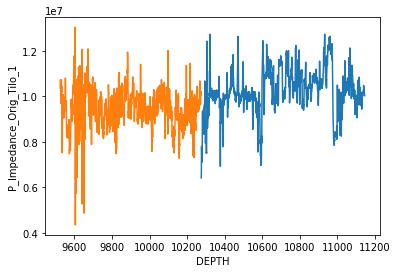

In [ ]:
sns.lineplot(original_tilo['DEPTH'], original_tilo['P_Impedance_Orig_Tilo_1'])
sns.lineplot(df_forecast['DEPTH'], df_forecast['P_Impedance_Orig_Tilo_1'])

In [ ]:
original_tilo
Well_Log_Tilo